# Project
- Build a complete neural network using Numpy. 
- Implement all the steps required to build a network - feedforward, loss computation, backpropagation, weight updates etc
- Dataset: MNIST

In [3]:
#importing basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

- The MNIST dataset we use here is 'mnist.pkl.gz' which is divided into training, validation and test data.
- We must read data first before making any progress

In [4]:
import gzip
import pickle

In [5]:
filename='mnist.pkl.gz'
file = gzip.open(filename,'rb')
file.seek(0) # Position pointer to 0
train_set, validation_set, test_set = pickle.load(file,encoding="latin1")
file.close()


In [6]:
train_set

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 8, 4, 8], dtype=int64))

In [7]:
train_set[0][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [8]:
train_set[1]

array([5, 0, 4, ..., 8, 4, 8], dtype=int64)

- ok, so feature set is train_set[0] and target is train_set[1]

In [9]:
# Shape of all the data 
print(train_set[0].shape,train_set[1].shape)
print(validation_set[0].shape,validation_set[1].shape)
print(test_set[0].shape,test_set[1].shape)

(50000, 784) (50000,)
(10000, 784) (10000,)
(10000, 784) (10000,)


- The target variable is like labels for each feature
- So, instead of having single label we prefer one hot encoding where the target is of the dimension 10 x (length of target)
- Why we are doing this? Ans - The output of the model is softmax output of length 10
- We have to do this for all the datasets - training, validation and test
   

In [10]:
len(train_set[1])

50000

In [11]:
# Creating a function to create one hot encoding

def onehot(val_list):
    length = len(val_list)
    # Create a blank array 
    barray = np.zeros((10,length))
    # Now have to put 1 at the correct place based on input
    col = 0
    for i in val_list:
        barray[i][col] = 1.0 # put 1 according to the value and move to next column
        col +=1
    return barray
    

In [12]:
# Lets test it with only 1 value 
arr = np.array([4]) # 4th  position will be filled (starting with 0)
onehot(arr)

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [13]:
# Testing will all digits
arr = np.array([5,1,2,0,4,8,6,9,7,3])
onehot(arr)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

- This is fine

In [14]:
# Now time to mould target sets 
train_set_X = np.array(train_set[0][:])
train_set_Y = np.array(train_set[1][:])
print(train_set_X.shape,train_set_Y.shape)

(50000, 784) (50000,)


In [15]:
# Need to transpose the feature set
train_set_X = train_set_X.T
print(train_set_X.shape)

(784, 50000)


In [16]:
# Lets do the same for other sets
validation_set_X = np.array(validation_set[0][:])
validation_set_Y = np.array(validation_set[1][:])

test_set_X = np.array(validation_set[0][:])
test_set_Y = np.array(validation_set[1][:])

In [17]:
#applying one hot encoding to target variables
train_set_Y = onehot(train_set_Y)
validation_set_Y = onehot(validation_set_Y)
test_set_Y = onehot(test_set_Y)

In [18]:
print(train_set_Y.shape,validation_set_Y.shape,test_set_Y.shape)

(10, 50000) (10, 10000) (10, 10000)


In [19]:
import random

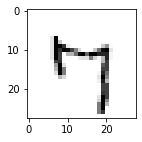

In [20]:
# Lets check a random image 
img_no = random.randint(0,1000)
plt.figure(figsize=(2,2))
plt.imshow(train_set_X[:,img_no].reshape(28,28),cmap="Greys")

In [21]:
# Feed Forward - Activation Functions
def sigmoid(x):
    out = 1/(1+np.exp(-x))
    prev_input =x
    return out, prev_input  # layer out put h and hprev

def relu(x):
    out = np.maximum(x,0)
    prev_input=x
    assert(out.shape==x.shape)
    return out,prev_input

def softmax(x):
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp,axis = 0, keepdims = True)
    out = x_exp/x_sum
    prev_input=x
    return out, prev_input

In [22]:
z=np.array([2,-1,0,3,-100,100,-4,4]).reshape(4,2)
print(z,relu(z))
print(z,softmax(z))
print(z,sigmoid(z))


[[   2   -1]
 [   0    3]
 [-100  100]
 [  -4    4]] (array([[  2,   0],
       [  0,   3],
       [  0, 100],
       [  0,   4]]), array([[   2,   -1],
       [   0,    3],
       [-100,  100],
       [  -4,    4]]))
[[   2   -1]
 [   0    3]
 [-100  100]
 [  -4    4]] (array([[8.78878243e-01, 1.36853947e-44],
       [1.18943236e-01, 7.47197234e-43],
       [4.42477874e-45, 1.00000000e+00],
       [2.17852136e-03, 2.03109266e-42]]), array([[   2,   -1],
       [   0,    3],
       [-100,  100],
       [  -4,    4]]))
[[   2   -1]
 [   0    3]
 [-100  100]
 [  -4    4]] (array([[8.80797078e-01, 2.68941421e-01],
       [5.00000000e-01, 9.52574127e-01],
       [3.72007598e-44, 1.00000000e+00],
       [1.79862100e-02, 9.82013790e-01]]), array([[   2,   -1],
       [   0,    3],
       [-100,  100],
       [  -4,    4]]))


In [23]:
neuron_count = [784,45,22,10] # Number of neurons in each count

def init_parameters(list_neurons):
    
    parameters = {}
    L = len(list_neurons)
    
    for i in range(1,L):
        parameters["W"+str(i)] = np.random.randn(list_neurons[i], list_neurons[i-1]) * 0.1
        parameters['b' + str(i)] = np.zeros((list_neurons[i], 1))  
        
        assert(parameters['W' + str(i)].shape == (list_neurons[i], list_neurons[i-1]))
        assert(parameters['b' + str(i)].shape == (list_neurons[i], 1))
        
    return parameters

In [24]:
parameters = init_parameters(neuron_count)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))

W1 = [[-0.17971583  0.17749536 -0.12167796 ...  0.00298204 -0.06232611
   0.16599064]
 [ 0.09587989  0.12983142  0.0457076  ... -0.06008387 -0.07041519
  -0.0734001 ]
 [ 0.0590585   0.05864395 -0.10490222 ... -0.01370336  0.06514421
  -0.21283107]
 ...
 [-0.10664249 -0.09398566 -0.1942275  ...  0.10216626 -0.04097427
   0.14833526]
 [ 0.0184405   0.09614598 -0.10738451 ... -0.04451764  0.00075468
  -0.08716545]
 [-0.07470964 -0.01355043  0.17611045 ... -0.03429762  0.04960504
   0.00597265]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 1.72344103e-02 -1.13610539e-01  2.01949916e-02  7.89692777e-02
   2.00842425e-01  9.85159601e-02  8.05505900e-02  5.08365088e-02
   3.62990371e-02  1.48109756e-01  1.44019593e-01  8.09235471e-02
  -8.93075262e-02 -2.531

In [25]:
# single layer forward
def single_layer_forward (H_prev,W,b,activation='relu'):
    
    # activation = sigmoid
    if activation == "sigmoid":
        Z = np.dot(W, H_prev) + b 
        linear_memory = (H_prev, W, b)
        H, activation_memory = sigmoid(Z)
 
    elif activation == "softmax":
        Z = np.dot(W, H_prev) + b 
        linear_memory = (H_prev, W, b)
        H, activation_memory = softmax(Z)
    
    elif activation == "relu":
        #print(" shape w", W.shape, " shape H", H_prev)
        Z = np.dot(W, H_prev) + b
        linear_memory = (H_prev, W, b)
        H, activation_memory = relu(Z)
        
    assert (H.shape == (W.shape[0], H_prev.shape[1]))
    memory = (linear_memory, activation_memory)

    return H, memory

In [26]:
 # Test
H_prev = np.array([[1,0, 5, 10, 2], [2, 5, 3, 10, 2]])
W_sample = np.array([[10, 5], [2, 0], [1, 0]])
b_sample = np.array([10, 5, 0]).reshape((3, 1))

Z = np.dot(W_sample, H_prev) + b_sample
Z
#H = single_layer_forward(H_prev, W_sample, b_sample)[0]
#H

array([[ 30,  35,  75, 160,  40],
       [  7,   5,  15,  25,   9],
       [  1,   0,   5,  10,   2]])

In [28]:
# Now  for L_layer
def multi_layer_forward(X,parameters):
    memories = []
    H = X
    L = len(parameters)//2
    #print(L)
    
    for i in range(1,L):
        H_prev = H
        H,memory = single_layer_forward(H_prev,parameters["W"+str(i)],parameters["b"+str(i)],activation='relu')
        memories.append(memory)
        
    # Implement the final softmax layer
    # HL here is the final prediction P as specified in the lectures
    HL, memory = single_layer_forward(H, parameters["W" + str(L)], parameters["b" + str(L)],activation="softmax")
    memories.append(memory)

    assert(HL.shape == (10, X.shape[1]))
            
    return HL, memories    

In [29]:
# verify
# X is (784, 10)
# parameters is a dict
# HL should be (10, 10)
x_sample = train_set_X[:, 10:20]
print(x_sample.shape)
HL = multi_layer_forward(x_sample, parameters=parameters)[0]
print(HL[:, :5])

(784, 10)
[[0.10505824 0.10809974 0.10742884 0.10827533 0.1043315 ]
 [0.08388441 0.08798173 0.09076671 0.09444689 0.10357669]
 [0.10585231 0.10652031 0.11499845 0.1098712  0.10225505]
 [0.15150747 0.1063141  0.11056117 0.10875693 0.10831372]
 [0.11968172 0.10883656 0.12116584 0.10470745 0.10038303]
 [0.09684642 0.10892533 0.09474728 0.10444409 0.10060403]
 [0.06535662 0.07579792 0.07545279 0.07992684 0.09100451]
 [0.09350021 0.0953626  0.0958     0.09680762 0.09118882]
 [0.08193323 0.09687351 0.08271202 0.08942496 0.09510008]
 [0.09637937 0.10528821 0.10636688 0.10333869 0.10324257]]


### Compute loss

- Compute loss function after every forward pass
- Keep checking whether it is decreasing with training
- Loss function : Cross Entropy Loss Function (-1) * sum(y*log(p)) -P is probability matrix
- For m data points average loss  : (-1/m) * sum(y*log(p))


In [30]:
zr = np.array([[11]])
pt = np.squeeze(zr)
print(np.squeeze(zr))
print(pt,type(pt))
assert(pt.shape==())
print(pt,type(pt))

11
11 <class 'numpy.ndarray'>
11 <class 'numpy.ndarray'>


In [32]:
def compute_loss (HL,Y):
    #HL is probability matrix like previous output
    #Another argument is true label that is Y
    # Using cross entropy loss function
    
    m = Y.shape[1]
    
    loss =  (-1.0/m) * np.sum(np.multiply(Y, np.log(HL)))
    
    loss = np.squeeze(loss)
    assert(loss.shape==())
    return loss
    

In [33]:
# sample
# HL is (10, 5), Y is (10, 5)
np.random.seed(2)
HL_sample = np.random.rand(10,5)
Y_sample = train_set_Y[:, 10:15]
print(HL_sample)
print(Y_sample)

print(compute_loss(HL_sample, Y_sample))

[[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678 ]
 [0.33033482 0.20464863 0.61927097 0.29965467 0.26682728]
 [0.62113383 0.52914209 0.13457995 0.51357812 0.18443987]
 [0.78533515 0.85397529 0.49423684 0.84656149 0.07964548]
 [0.50524609 0.0652865  0.42812233 0.09653092 0.12715997]
 [0.59674531 0.226012   0.10694568 0.22030621 0.34982629]
 [0.46778748 0.20174323 0.64040673 0.48306984 0.50523672]
 [0.38689265 0.79363745 0.58000418 0.1622986  0.70075235]
 [0.96455108 0.50000836 0.88952006 0.34161365 0.56714413]
 [0.42754596 0.43674726 0.77655918 0.53560417 0.95374223]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.8964600261334037


### Backpropagation of errors


In [34]:
# First we need a function similar to compute dz
def propagate_backward(dh,memory,activation):
    # Gradient =dh 
    # Sigmoid
    Z= memory
    if activation=="sigmoid":
        H = 1/(1+np.exp(-Z))
        dz = dh * H * (1-H)
        
    elif activation == "relu":
        dz = np.array(dh, copy=True) # dZ will be the same as dA wherever the elements of A weren't 0
        dz[Z <= 0] = 0
        
    assert (dz.shape == Z.shape)
    return dz

In [35]:
# Now we need backward output for single layer
def single_layer_backward(dh, memory,activation="relu"):
    linear_memory,activation_memory = memory
    
    dz = propagate_backward(dh,activation_memory,activation)
    H_prev, W, b = linear_memory
    m = H_prev.shape[1]
    dw = (1.0/m) * np.dot(dz, H_prev.T)
    db = (1.0 / m) * np.sum(dz, axis=1, keepdims=True)
    dh_prev = np.dot(linear_memory[1].T, dz)
    
    return dh_prev,dw,db

In [35]:
# verify
# l-1 has two neurons, l has three, m = 5
# H_prev is (l-1, m)
# W is (l, l-1)
# b is (l, 1)
# H should be (l, m)
H_prev = np.array([[1,0, 5, 10, 2], [2, 5, 3, 10, 2]])
W_sample = np.array([[10, 5], [2, 0], [1, 0]])
b_sample = np.array([10, 5, 0]).reshape((3, 1))

H, memory = single_layer_forward(H_prev, W_sample, b_sample)
np.random.seed(2)
dH = np.random.rand(3,5)
dH_prev, dW, db = single_layer_backward(dH, memory)
print('dH_prev is \n' , dH_prev)
print('dW is \n' ,dW)
print('db is \n', db)


dH_prev is 
 [[5.6417525  0.66855959 6.86974666 5.46611139 4.92177244]
 [2.17997451 0.12963116 2.74831239 2.17661196 2.10183901]]
dW is 
 [[1.67565336 1.56891359]
 [1.39137819 1.4143854 ]
 [1.3597389  1.43013369]]
db is 
 [[0.37345476]
 [0.34414727]
 [0.29074635]]


In [36]:
# For L Layers keep on calculate gradient 
def multi_layer_backward(HL, Y, memories):
    
    # Takes the predicted value HL and the true target value Y and the 
    # memories calculated by L_layer_forward as input
    
    # returns the gradients calulated for all the layers as a dict

    gradients = {}
    L = len(memories) # the number of layers
    #print(L)
    m = HL.shape[1]
    Y = Y.reshape(HL.shape) # after this line, Y is the same shape as HL
    
    # Perform the backprop for the last layer that is the softmax layer
    current_memory = memories[-1]
    linear_memory, activation_memory = current_memory
    dZ = HL - Y
    H_prev, W, b = linear_memory
    gradients["dH" + str(L-1)] = np.dot(linear_memory[1].T, dZ)
    gradients["dW" + str(L)] = (1.0 / m) * np.dot(dZ, H_prev.T) 
    gradients["db" + str(L)] = (1.0 / m) * np.sum(dZ, axis=1, keepdims=True)
     
    # Perform the backpropagation l-1 times
    for l in reversed(range(L-1)):
        # Lth layer gradients: "gradients["dH" + str(l + 1)] ", gradients["dW" + str(l + 2)] , gradients["db" + str(l + 2)]
        current_memory = memories[l]
        
        dH_prev_temp, dW_temp, db_temp = single_layer_backward(gradients["dH" + str(l + 1)], current_memory,activation="relu")
        gradients["dH" + str(l)] = dH_prev_temp
        gradients["dW" + str(l + 1)] = dW_temp
        gradients["db" + str(l + 1)] = db_temp


    return gradients


In [37]:
parameters.keys()

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])

In [38]:
##### verify
# X is (784, 10)
# parameters is a dict
# HL should be (10, 10)
x_sample = train_set_X[:, 10:20]
y_sample = train_set_Y[:, 10:20]

HL, memories = multi_layer_forward(x_sample, parameters=parameters)
gradients  = multi_layer_backward(HL, y_sample, memories)
print('dW3 is \n', gradients['dW3'])
print('db3 is \n', gradients['db3'])
print('dW2 is \n', gradients['dW2'])
print('db2 is \n', gradients['db2'])


dW3 is 
 [[ 0.00963716  0.          0.0285094   0.02738736  0.01424124  0.03241527
   0.03083011  0.00013116  0.          0.01855019  0.01525012  0.08500162
   0.01266539  0.00040786  0.01458491  0.04171005  0.01763245  0.00864049
   0.03792124  0.00025942  0.01387686  0.00555116]
 [-0.01533125  0.          0.00775839  0.0126042  -0.00144876  0.00648266
  -0.03044748  0.00011441  0.          0.00055676  0.00255072  0.04571754
   0.00943349  0.00033196  0.01142653  0.03217844  0.01035296  0.00211122
   0.01212671  0.00018164 -0.01974972  0.00454849]
 [ 0.00997107  0.          0.03092506 -0.00801676  0.01482014 -0.03621567
   0.02316334  0.00013309  0.         -0.02103732  0.01587223  0.03172836
   0.01459812  0.0004019   0.01536041 -0.00223577  0.01857028  0.00787309
   0.00779063  0.00027293  0.00760524 -0.00650638]
 [-0.03996863  0.         -0.0228756  -0.03740734 -0.09259565 -0.04663876
  -0.0811586   0.00013174  0.         -0.07131878 -0.01751133 -0.08257563
  -0.00410823  0.0004011

In [39]:
parameters.keys()


dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])

In [40]:
gradients.keys()

dict_keys(['dH2', 'dW3', 'db3', 'dH1', 'dW2', 'db2', 'dH0', 'dW1', 'db1'])

In [41]:
# Parameter Updates
def update_parameters(parameters, gradients, learning_rate):

    # parameters is the python dictionary containing the parameters W and b for all the layers
    # gradients is the python dictionary containing your gradients, output of L_model_backward
    
    # returns updated weights after applying the gradient descent update

    
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * gradients["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * gradients["db" + str(l+1)]

        
    return parameters

# Model

In [42]:
# define model

def multi_layer_model(X,Y, dimensions, learning_rate=0.0075,num_iterations=5000,displayLoss=True):
    np.random.seed(2)
    
    losses = []
    
    parameters = init_parameters(dimensions)
    
    for i in range(num_iterations):
        # Forward
        HL, memories = multi_layer_forward(X,parameters)
        
        #What is the loss after cycle i
        loss = compute_loss(HL,Y)
        losses.append(loss)
        if displayLoss and i%100==0 :
            print("Loss after iteration : ",i," is: ",loss)
        
        # do backward
        gradients = multi_layer_backward(HL,Y,memories)
        #print(" Gradients Updated")
        # Update parameters.
        parameters = update_parameters(parameters, gradients, learning_rate)
        #print(" Parameters Updated")
    
    # plotting the loss
    plt.plot(np.squeeze(losses))
    plt.ylabel('loss')
    plt.xlabel('iterations')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return parameters, loss

### Training



In [43]:
# Test if it runs first for taking 5000 samples
train_set_x_check = train_set_X[:,0:50000]
train_set_y_check = train_set_Y[:,0:50000]
dimensions = [784, 45, 10]

Loss after iteration :  0  is:  2.4246789933912782
Loss after iteration :  100  is:  2.140705386693057
Loss after iteration :  200  is:  1.9021718576946665
Loss after iteration :  300  is:  1.6426449337979832
Loss after iteration :  400  is:  1.3946677249053185
Loss after iteration :  500  is:  1.1900038053514148
Loss after iteration :  600  is:  1.034682048640615
Loss after iteration :  700  is:  0.9195562750265724
Loss after iteration :  800  is:  0.8333800202193232
Loss after iteration :  900  is:  0.7673887147165096
Loss after iteration :  1000  is:  0.7155335692969371
Loss after iteration :  1100  is:  0.6738343799240519
Loss after iteration :  1200  is:  0.639607818150777
Loss after iteration :  1300  is:  0.6110357086697551
Loss after iteration :  1400  is:  0.5868269556407258
Loss after iteration :  1500  is:  0.5660570067311895
Loss after iteration :  1600  is:  0.5480198805341189
Loss after iteration :  1700  is:  0.5321944271709551
Loss after iteration :  1800  is:  0.518208

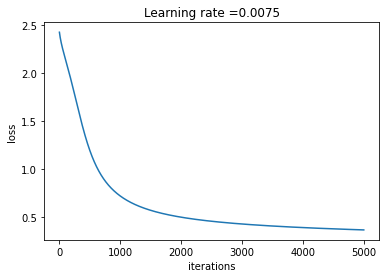

In [44]:
trained_parameters = multi_layer_model(train_set_x_check, train_set_y_check, dimensions)

In [44]:
def predict(X, y, parameters):
    
    # Performs forward propogation using the trained parameters and calculates the accuracy
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    
    # Forward propagation
    probas, caches = multi_layer_forward(X, parameters)
    
    p = np.argmax(probas, axis = 0)
    act = np.argmax(y, axis = 0)
    df = pd.DataFrame({"probas":p,"actual":act})
    print(df)
    
    print("Accuracy: "  + str(np.sum((p == act)/m)))
        
    return p

In [45]:
pred_train = predict(train_set_x_check, train_set_y_check, parameters)


      probas  actual
0          1       5
1          8       0
2          8       4
3          4       1
4          8       9
...      ...     ...
4995       8       7
4996       3       3
4997       8       2
4998       8       1
4999       8       2

[5000 rows x 2 columns]
Accuracy: 0.0996
